# Introdução à Ciência de Redes
### (complex network analysis)

#### 1 - Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import networkx as nx     # https://networkx.org/
import matplotlib.pyplot as plt

%matplotlib inline

#### 2 - Declarando um grafo

In [5]:
G = nx.Graph()
G

#### 3 - Adicionando arestas e nós

In [6]:
G.add_edge('A','B')
G.edges()

EdgeView([('A', 'B')])

#### 4 - Grafos direcionados

In [8]:
G2 = nx.DiGraph()
G2

#### 5 - Adicionando arestas e nós

In [9]:
G2.add_edge(1,5)
G2.edges()

OutEdgeView([(1, 5)])

#### 6 - Arestas com pesos

In [10]:
G.add_edge(4,5, weight = 6)
G.add_edge(6,5, weight = 13)

G.edges(data=True)

EdgeDataView([('A', 'B', {}), (4, 5, {'weight': 6}), (5, 6, {'weight': 13})])

#### 7 - Arestas com sinais

In [14]:
G.add_edge(11,15, sign = '+')

G.edges(data=True)

EdgeDataView([('A', 'B', {}), (4, 5, {'weight': 6}), (5, 6, {'weight': 13}), (11, 15, {'sign': '+'})])

#### 8 - Multigraphs (arestas paralelas)

In [15]:
G3 = nx.MultiGraph()
G3

In [16]:
G3.add_edge('A','B', relation='friend')
G3.add_edge('A','B', relation='coworker')
G3.add_edge('B','C', weight = 2, relation='family')

0

#### 9 - Imprimindo Arestas

In [17]:
G3.edges(data=True)

MultiEdgeDataView([('A', 'B', {'relation': 'friend'}), ('A', 'B', {'relation': 'coworker'}), ('B', 'C', {'weight': 2, 'relation': 'family'})])

#### 10 - Acessando Arestas

In [18]:
G3['A']['B'][0]

{'relation': 'friend'}

In [19]:
G3['A']['B'][1]['relation'] = 'student'
G3['B']['A'][1]['relation']

'student'

In [20]:
G3.edges(data=True)

MultiEdgeDataView([('A', 'B', {'relation': 'friend'}), ('A', 'B', {'relation': 'student'}), ('B', 'C', {'weight': 2, 'relation': 'family'})])

#### 11 - MultiDiGraph

In [21]:
G4 = nx.MultiDiGraph()
G4

In [22]:
G4.add_edge('A','B', weight=6, relation='family')
G4.add_edge('A','B', weight=18, relation='friend')
G4.add_edge('C','B', weight=13, relation='friend')

0

In [24]:
G4.edges(data=True)

OutMultiEdgeDataView([('A', 'B', {'weight': 6, 'relation': 'family'}), ('A', 'B', {'weight': 18, 'relation': 'friend'}), ('C', 'B', {'weight': 13, 'relation': 'friend'})])

In [23]:
G4['A']['B'][1]['relation']

'friend'

#### 12 - Adicionando e acessando nós (Nodes)

In [27]:
G.add_node('T', role='trader')
G.nodes['T']['role']

'trader'

#### 13 - Grafos bi-partidos

In [28]:
from networkx.algorithms import bipartite

In [29]:
B = nx.Graph()
B.add_nodes_from(['A','B','C','D','E'], bipartite = 0, color='red')

In [30]:
B.add_nodes_from([1,2,3,4], bipartite = 1, color='blue')

In [31]:
B.add_edges_from([('A',1),('B',1),('C',1),('C',3),('D',2),('E',3),('E',4)])

In [34]:
B.edges()

EdgeView([('A', 1), ('B', 1), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)])

In [33]:
B.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 1, 2, 3, 4))

#### 14 - Verificar se um grafo é bi-partido

In [35]:
bipartite.is_bipartite(B)

True

In [36]:
B.add_edge('A','B')
bipartite.is_bipartite(B)

False

In [37]:
B.remove_edge('A','B')
bipartite.is_bipartite(B)

True

#### 15 - Desenhar grafo bi-partido

In [39]:
colors = []
for node in B.nodes():
    colors.append(B.nodes[node]['color'])
colors

['red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue']

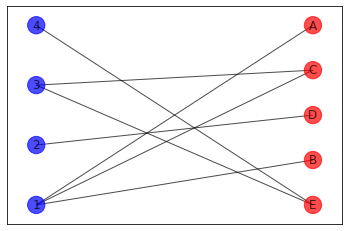

In [40]:
X = set([1,2,3,4])

nx.draw_networkx(
    B,
    pos = nx.drawing.layout.bipartite_layout(B, X), alpha=0.7, node_color=colors) # Or whatever other display options you like

#### 16 - Verificar se um conjunto é uma das partes do grafo bi-partido

In [41]:
bipartite.is_bipartite_node_set(B,X)

True

#### 17 - Grafos bi-partidos projetados

In [42]:
bipartite.projected_graph(B,X).edges()

EdgeView([(1, 3), (3, 4)])

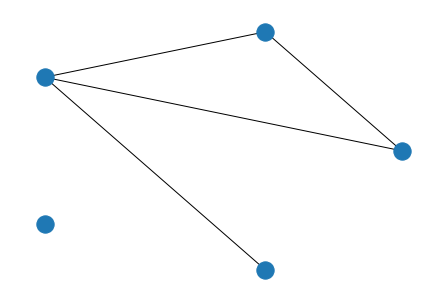

In [43]:
nx.draw_circular(bipartite.projected_graph(B,['A','B','C','D','E']))

#### 18 - Desenhando Karate Club

Node Degree
0 16
1 9
2 10
3 6
4 3
5 4
6 4
7 4
8 5
9 2
10 3
11 1
12 2
13 5
14 2
15 2
16 2
17 2
18 2
19 3
20 2
21 2
22 2
23 5
24 3
25 3
26 2
27 4
28 3
29 4
30 4
31 6
32 12
33 17


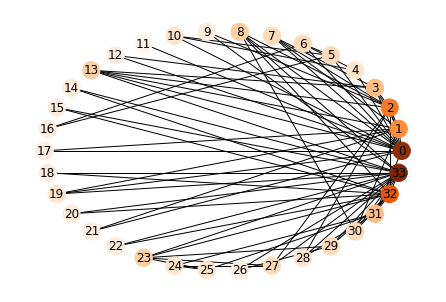

In [44]:
G = nx.karate_club_graph()
print("Node Degree")
colors = []
for v in G:
    print('%s %s' % (v, G.degree(v)))
    colors.append(G.degree(v))

nx.draw_circular(G, node_color=colors, with_labels=True, cmap=plt.cm.Oranges)

#### 19 - Colorindo arestas

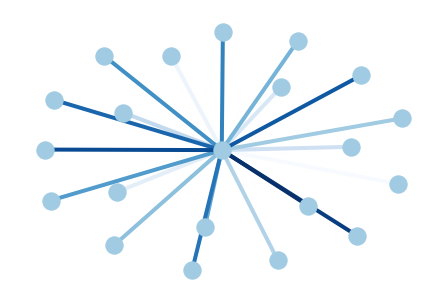

In [45]:
G = nx.star_graph(20)
pos = nx.spring_layout(G)
colors = range(20)
nx.draw(G, pos, node_color='#A0CBE2', edge_color=colors,
        width=4, edge_cmap=plt.cm.Blues, with_labels=False)
plt.show()

## Exemplo: Rede jogadores de xadrez

#### 20 - Carregando a rede

In [47]:
!head -400 ./Data/chess_graph.txt

chess = nx.read_edgelist('./Data/chess_graph.txt', data=[('outcome', int), ('timestamp', float)], 
                         create_using=nx.MultiDiGraph())
chess

1 2 0	885635999.999997
1 3 0	885635999.999997
1 4 0	885635999.999997
1 5 1	885635999.999997
1 6 0	885635999.999997
7 8 0	885635999.999997
7 9 1	885635999.999997
7 10 1	885635999.999997
11 12 -1	885635999.999997
13 14 1	885635999.999997
15 16 1	885635999.999997
17 18 -1	885635999.999997
19 7 0	885635999.999997
19 8 0	885635999.999997
19 20 -1	885635999.999997
19 21 -1	885635999.999997
19 22 1	885635999.999997
23 1 -1	885635999.999997
23 2 -1	885635999.999997
23 3 1	885635999.999997
24 25 1	885635999.999997
26 27 -1	885635999.999997
28 29 1	885635999.999997
30 31 1	885635999.999997
32 33 0	885635999.999997
32 34 0	885635999.999997
32 35 0	885635999.999997
32 36 0	885635999.999997
32 37 1	885635999.999997
38 39 1	885635999.999997
38 40 1	885635999.999997
38 41 -1	885635999.999997
33 42 0	885635999.999997
33 43 0	885635999.999997
44 19 0	885635999.999997
44 45 0	885635999.999997
44 46 0	885635999.999997
34 47 0	885635999.999997
34 48 0	885635999.999997
49 50 1	885635999.999997
49 12 -1	885

#### 21 - Verificando tipos de grafos

In [48]:
chess.is_directed(), chess.is_multigraph()

(True, True)

#### 22 - Imprindo arestas e atributos

In [57]:
# chess.edges(data=True)

#### 23 - Quantos jogos cada jogador jogou?

In [56]:
# list(chess.degree())

#### 24 - Quem jogou mais jogos?

In [51]:
max_value = max(chess.degree(), key=lambda k: k[1])
max_value

('461', 280)

#### 25 - Limpando base de dados no pandas

In [52]:
df = pd.DataFrame(chess.edges(data=True), columns=['white', 'black', 'outcome'])
df.head()

df['outcome'] = df['outcome'].map(lambda x: x['outcome'])
df.head()

,white,black,outcome
0,1,2,0
1,1,3,0
2,1,4,0
3,1,5,1
4,1,6,0


#### 26 - Quantos jogos cada jogador ganhou com peças brancas? E pretas?

In [54]:
won_as_white = df[df['outcome']==1].groupby('white').sum()
won_as_black = -df[df['outcome']==-1].groupby('black').sum()
win_count = won_as_white.add(won_as_black, fill_value=0)
win_count.tail()

,outcome
995,7.0
996,3.0
997,13.0
998,3.0
999,5.0


#### 27 - Quem ganhou mais jogos?

In [55]:
win_count.nlargest(5, 'outcome')

,outcome
330,109.0
467,103.0
98,94.0
456,88.0
461,88.0
